In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapely as sp
import gtfs_functions as gtfs

In [132]:
# DIRECTORY = '../data/gtfs'
DIRECTORY = input('Enter location of directory (no end slash or quotes)')
while (DIRECTORY[-1] == "/") or (DIRECTORY[-1] == "\\") or (DIRECTORY[-1] == "'") or (DIRECTORY[-1] == '"'):
       DIRECTORY = input('Enter location of directory (no end slash or quotes)')
print(DIRECTORY)

../data/gtfs-2022-04-12


In [133]:
calendar = pd.read_csv('{}/calendar.txt'.format(DIRECTORY))
calendar_attrs = pd.read_csv('{}/calendar_attributes.txt'.format(DIRECTORY))
directions = pd.read_csv('{}/directions.txt'.format(DIRECTORY))
feed_info = pd.read_csv('{}/feed_info.txt'.format(DIRECTORY))
rider_cats = pd.read_csv('{}/rider_categories.txt'.format(DIRECTORY))
routes = pd.read_csv('{}/routes.txt'.format(DIRECTORY))
runcut = pd.read_csv('{}/runcut.txt'.format(DIRECTORY))
shapes = pd.read_csv('{}/shapes.txt'.format(DIRECTORY))
stops = pd.read_csv('{}/stops.txt'.format(DIRECTORY))
stop_attrs = pd.read_csv('{}/stop_attributes.txt'.format(DIRECTORY))
stop_times = pd.read_csv('{}/stop_times.txt'.format(DIRECTORY))
trips = pd.read_csv('{}/trips.txt'.format(DIRECTORY))

In [134]:
date = str(feed_info.feed_start_date[0])
date = date[:4] + '-' + date[4:6] + '-' + date[6:8]
FILENAME = 'gtfs-' + date

In [135]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,p_1277992,51.188892,-115.541962,1,0.000000
1,p_1277992,51.188892,-115.542145,2,12.793945
2,p_1277992,51.188885,-115.542305,3,24.006984
3,p_1277992,51.188866,-115.542519,4,39.116798
4,p_1277992,51.188816,-115.542793,5,59.064081


In [136]:
trips.head()

,route_id,service_id,trip_id,trip_short_name,trip_headsign,direction_id,block_id,shape_id,bikes_allowed,wheelchair_accessible,trip_type,drt_max_travel_time,drt_avg_travel_time,drt_advance_book_min,drt_pickup_message,drt_drop_off_message,continuous_pickup_message,continuous_drop_off_message,tts_trip_headsign,tts_trip_short_name
0,12635,c_17992_b_22458_d_127,t_871411_b_22458_tn_2,NaN,Lake Louise,0,8X,p_787691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12635,c_17992_b_22458_d_127,t_871417_b_22458_tn_0,NaN,Lake Louise,0,8X,p_787691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12635,c_17992_b_22458_d_127,t_871412_b_22458_tn_2,NaN,Lake Louise,0,8X,p_787691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12635,c_17992_b_22458_d_127,t_871412_b_22458_tn_1,NaN,Lake Louise,0,8X,p_787691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12635,c_17992_b_22458_d_127,t_871410_b_22458_tn_1,NaN,Lake Louise,0,8X,p_787691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
routes.head()

,agency_id,route_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,min_headway_minutes,eligibility_restricted,continuous_pickup,continuous_drop_off,tts_route_short_name,tts_route_long_name
0,782,33007,5C,Route 5C - Cougar Creek,Route 5C provides local service within Canmore...,3,NaN,b288b9,000000,0,30,0,1,1,NaN,NaN
1,782,33008,5T,Route 5T - Three Sisters,Route 5T provides local service within Canmore...,3,NaN,4c12a1,FFFFFF,0,30,0,1,1,NaN,NaN
2,782,9507,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3,NaN,336611,FFFFFF,0,40,0,1,1,NaN,NaN
3,782,9506,2,Route 2 - Tunnel Mountain,Roam Route 2 provides service from the top of ...,3,NaN,00afd7,FFFFFF,1,40,0,1,1,NaN,NaN
4,782,9505,3,Route 3 - Canmore/Banff Regional,Roam Route 3 provides regional service between...,3,NaN,ee2737,FFFFFF,2,60,0,1,1,NaN,NaN


In [138]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,drop_off_booking_rule_id,start_pickup_dropoff_window,end_pickup_dropoff_window,mean_duration_factor,mean_duration_offset,safe_duration_factor,safe_duration_offset,tts_stop_headsign,min_arrival_time,max_departure_time
0,t_1552898_b_19293_tn_1,06:15:00,06:15:00,2428701,1,Banff Gondola,0,0,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,t_1552898_b_19293_tn_1,06:16:00,06:16:00,2428700,2,Banff Gondola,0,0,277.441125,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,t_1552898_b_19293_tn_1,06:17:00,06:17:00,2428699,3,Banff Gondola,0,0,603.296796,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,t_1552898_b_19293_tn_1,06:17:00,06:17:00,2428698,4,Banff Gondola,0,0,902.882020,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,t_1552898_b_19293_tn_1,06:18:00,06:18:00,2428669,5,Banff Gondola,0,0,1141.851296,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
calendar.head()

,service_id,service_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,c_24452_b_34253_d_96,Spring 2022 Route 3 (Weekend),0,0,0,0,0,1,1,20220404,20230402
1,c_24452_b_34253_d_31,Spring 2022 Route 3 (Weekday),1,1,1,1,1,0,0,20220404,20230402
2,c_24447_b_34247_d_96,New Route 5C and 5T (Weekend),0,0,0,0,0,1,1,20220404,20230407
3,c_24447_b_34247_d_31,New Route 5C and 5T (Weekday),1,1,1,1,1,0,0,20220404,20230407
4,c_17992_b_22458_d_127,Fall Routes 8X 2021 (All days of week),1,1,1,1,1,1,1,20210920,20220519


In [140]:
calendar_attrs.head()

,service_id,service_description
0,c_24452_b_34253_d_96,Spring 2022 Route 3 (Weekend)
1,c_24452_b_34253_d_31,Spring 2022 Route 3 (Weekday)
2,c_24447_b_34247_d_96,New Route 5C and 5T (Weekend)
3,c_24447_b_34247_d_31,New Route 5C and 5T (Weekday)
4,c_17992_b_22458_d_127,Fall Routes 8X 2021 (All days of week)


In [141]:
stops.head()

,stop_id,stop_code,platform_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,position,direction,wheelchair_boarding,tts_stop_name
0,2428615,NaN,NaN,Stewart Creek,NaN,51.050576,-115.313940,1916.0,NaN,0,NaN,America/Edmonton,NaN,NaN,1,NaN
1,2428621,NaN,NaN,Boulder Crescent,NaN,51.078752,-115.327904,1916.0,NaN,0,NaN,America/Edmonton,NaN,NaN,1,NaN
2,2428622,NaN,NaN,Grotto Road,NaN,51.082297,-115.329944,1916.0,NaN,0,NaN,America/Edmonton,NaN,NaN,1,NaN
3,2428623,NaN,NaN,Grotto Way,NaN,51.079977,-115.332304,1916.0,NaN,0,NaN,America/Edmonton,NaN,NaN,1,NaN
4,2428624,NaN,NaN,Lady Macdonald Crescent,NaN,51.083399,-115.326982,1916.0,NaN,0,NaN,America/Edmonton,NaN,NaN,1,NaN


In [142]:
stop_times_df  = stop_times.drop(columns=['pickup_type', 'drop_off_type',
       'timepoint', 'start_service_area_id', 'end_service_area_id',
       'start_service_area_radius', 'end_service_area_radius',
       'continuous_pickup', 'continuous_drop_off', 'pickup_booking_rule_id',
       'drop_off_booking_rule_id', 'start_pickup_dropoff_window',
       'end_pickup_dropoff_window', 'mean_duration_factor',
       'mean_duration_offset', 'safe_duration_factor', 'safe_duration_offset',
       'tts_stop_headsign', 'min_arrival_time', 'max_departure_time'])

In [143]:
stops_df = stops.drop(columns=[ 'stop_code', 'platform_code',
       'zone_id', 'stop_url', 'location_type',
       'position', 'direction', 'parent_station',
       'wheelchair_boarding', 'tts_stop_name'])

In [144]:
trips_df = trips.drop(columns=[
       'direction_id',  'bikes_allowed', 'trip_short_name',
       'wheelchair_accessible', 'trip_type', 'drt_max_travel_time',
       'drt_avg_travel_time', 'drt_advance_book_min', 'drt_pickup_message',
       'drt_drop_off_message', 'continuous_pickup_message',
       'continuous_drop_off_message', 'tts_trip_headsign',
       'tts_trip_short_name'])

In [145]:
routes_df = routes.drop(columns=['agency_id',  'route_url', 'route_color',
       'route_text_color', 'route_sort_order', 'min_headway_minutes',
       'eligibility_restricted', 'continuous_pickup', 'continuous_drop_off',
       'tts_route_short_name', 'tts_route_long_name'])

In [146]:
gtfs_df = stop_times_df.merge(stops_df,how='left', on='stop_id')
gtfs_df = gtfs_df.merge(trips_df, how='left', on='trip_id')
gtfs_df = gtfs_df.merge(calendar, how='left', on='service_id')
gtfs_df = gtfs_df.merge(routes_df, how='left', on='route_id')
print(gtfs_df.shape)
gtfs_df.head()

(4262, 31)


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,shape_dist_traveled,stop_name,stop_desc,stop_lat,...,thursday,friday,saturday,sunday,start_date,end_date,route_short_name,route_long_name,route_desc,route_type
0,t_1552898_b_19293_tn_1,06:15:00,06:15:00,2428701,1,Banff Gondola,0.000000,Marmot Cresent,NaN,51.185722,...,1,1,1,1,20210920,20220519,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3
1,t_1552898_b_19293_tn_1,06:16:00,06:16:00,2428700,2,Banff Gondola,277.441125,Rotary Park,NaN,51.184506,...,1,1,1,1,20210920,20220519,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3
2,t_1552898_b_19293_tn_1,06:17:00,06:17:00,2428699,3,Banff Gondola,603.296796,Fox Street West,NaN,51.183153,...,1,1,1,1,20210920,20220519,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3
3,t_1552898_b_19293_tn_1,06:17:00,06:17:00,2428698,4,Banff Gondola,902.882020,Rabbit Street West,NaN,51.181943,...,1,1,1,1,20210920,20220519,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3
4,t_1552898_b_19293_tn_1,06:18:00,06:18:00,2428669,5,Banff Gondola,1141.851296,Moose Street,NaN,51.180335,...,1,1,1,1,20210920,20220519,1,Route 1 - Sulphur Mountain,Roam Route 1 provides service from the top of ...,3


In [147]:
size = gtfs_df.memory_usage(index=True).sum()/1000000
print('Dataframe file size is {:.2f} MB'.format(size))

Dataframe file size is 1.09 MB


In [148]:
gtfs_df.to_excel('./gtfs_sheets/{}.xlsx'.format(FILENAME), index=False)

In [149]:
#arrival_time = gtfs_df.groupby('route_long_name')['arrival_time'].agg('min')
#gtfs_df['arrival_dt'] = np.where(gtfs_df['arrival_time'][:2] == '24', str(next_date) + ' ' + gtfs_df['arrival_time'],str(date) + ' ' + gtfs_df['arrival_time'] )
gtfs_df['arrival_dt'] =  pd.to_timedelta(gtfs_df['arrival_time'])

In [150]:
date = pd.to_datetime(date)
gtfs_df['arrival_dt'] = date +gtfs_df['arrival_dt']

In [151]:
gtfs_df.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'shape_dist_traveled', 'stop_name', 'stop_desc',
       'stop_lat', 'stop_lon', 'stop_timezone', 'route_id', 'service_id',
       'trip_headsign', 'block_id', 'shape_id', 'service_name', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
       'start_date', 'end_date', 'route_short_name', 'route_long_name',
       'route_desc', 'route_type', 'arrival_dt'],
      dtype='object')

In [152]:
DAY = pd.Timedelta('1 days')
pull_in = gtfs_df.groupby(['route_long_name','service_name'])['arrival_dt'].agg(['min', 'max'])
pull_in['time_out'] = (pull_in['max'] - pull_in['min']) #/ pd.Timedelta(hours=1)
pull_in['charging_time'] = round((DAY - pull_in['time_out']) / pd.Timedelta(hours=1),2)
pull_in['time_out'] = round((pull_in['max'] - pull_in['min']) / pd.Timedelta(hours=1),2)
pull_in

min  \
route_long_name                      service_name                                                             
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week) 2022-04-12 06:15:00   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week) 2022-04-12 06:15:00   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                      2022-04-12 06:00:00   
                                     Spring 2022 Route 3 (Weekend)                      2022-04-12 06:00:00   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                      2022-04-12 06:01:00   
                                     New Route 5C and 5T (Weekend)                      2022-04-12 08:01:00   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                      2022-04-12 06:07:00   
                                     New Route 5C and 5T (Weekend)                      2022-04-12 08:07:00   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)             2022-04-12 07:30:00   

                                                                                                        max  \
route_long_name                      service_name                                                             
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week) 2022-04-12 23:40:00   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week) 2022-04-12 23:35:00   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                      2022-04-12 22:55:00   
                                     Spring 2022 Route 3 (Weekend)                      2022-04-12 23:25:00   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                      2022-04-12 22:43:00   
                                     New Route 5C and 5T (Weekend)                      2022-04-12 20:37:00   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                      2022-04-12 22:23:00   
                                     New Route 5C and 5T (Weekend)                      2022-04-12 20:02:00   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)             2022-04-12 23:53:00   

                                                                                         time_out  \
route_long_name                      service_name                                                   
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)     17.42   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)     17.33   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                          16.92   
                                     Spring 2022 Route 3 (Weekend)                          17.42   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                          16.70   
                                     New Route 5C and 5T (Weekend)                          12.60   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                          16.27   
                                     New Route 5C and 5T (Weekend)                          11.92   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)                 16.38   

                                                                                         charging_time  
route_long_name                      service_name                                                       
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)           6.58  
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)           6.67  
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                                7.08  
                       

[]

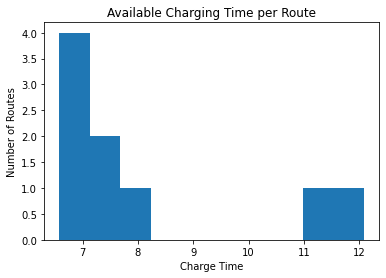

In [153]:
plt.hist(pull_in['charging_time'])
plt.xlabel('Charge Time')
plt.ylabel('Number of Routes')
plt.title('Available Charging Time per Route')
plt.plot()

In [154]:
schedule = gtfs_df.groupby(['route_long_name','service_name'])[['monday','tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',]].agg('mean')
schedule

monday  \
route_long_name                      service_name                                                 
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)     1.0   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)     1.0   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                          1.0   
                                     Spring 2022 Route 3 (Weekend)                          0.0   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                          1.0   
                                     New Route 5C and 5T (Weekend)                          0.0   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                          1.0   
                                     New Route 5C and 5T (Weekend)                          0.0   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)                 1.0   

                                                                                         tuesday  \
route_long_name                      service_name                                                  
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)      1.0   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)      1.0   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                           1.0   
                                     Spring 2022 Route 3 (Weekend)                           0.0   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                           1.0   
                                     New Route 5C and 5T (Weekend)                           0.0   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                           1.0   
                                     New Route 5C and 5T (Weekend)                           0.0   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)                  1.0   

                                                                                         wednesday  \
route_long_name                      service_name                                                    
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)        1.0   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)        1.0   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                             1.0   
                                     Spring 2022 Route 3 (Weekend)                             0.0   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                             1.0   
                                     New Route 5C and 5T (Weekend)                             0.0   
Route 5T - Three Sisters             New Route 5C and 5T (Weekday)                             1.0   
                                     New Route 5C and 5T (Weekend)                             0.0   
Route 8X - Lake Louise/Banff Express Fall Routes 8X 2021 (All days of week)                    1.0   

                                                                                         thursday  \
route_long_name                      service_name                                                   
Route 1 - Sulphur Mountain           Fall thru Spring Routes 1 and 2 (All days of week)       1.0   
Route 2 - Tunnel Mountain            Fall thru Spring Routes 1 and 2 (All days of week)       1.0   
Route 3 -  Canmore/Banff Regional    Spring 2022 Route 3 (Weekday)                            1.0   
                                     Spring 2022 Route 3 (Weekend)                            0.0   
Route 5C - Cougar Creek              New Route 5C and 5T (Weekday)                            1.0   
                                     New Route 5C and 5T (Weekend)  

In [155]:
with pd.ExcelWriter('./route_summaries/route_summary_{}.xlsx'.format(FILENAME)) as writer:
       pull_in.to_excel(writer, sheet_name='Pull-In' )
       schedule.to_excel(writer, sheet_name='Schedule')